In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
import sys
sys.path.append("../") # go to parent dir

### 9.11.1 U.S. Macroeconomic Variables

In [3]:
data = pd.read_csv('../data/USMacroG.csv', index_col=0)
data.head()

,gdp,consumption,invest,government,dpi,cpi,m1,tbill,unemp,population,inflation,interest
1,1610.5,1058.9,198.1,361.0,1186.1,70.6,110.20,1.12,6.4,149.461,NaN,NaN
2,1658.8,1075.9,220.4,366.4,1178.1,71.4,111.75,1.17,5.6,150.260,4.5071,-3.3404
3,1723.0,1131.0,239.7,359.6,1196.5,73.2,112.95,1.23,4.6,151.064,9.9590,-8.7290
4,1753.9,1097.6,271.8,382.5,1210.0,74.9,113.93,1.35,4.2,151.871,9.1834,-7.8301
5,1773.5,1122.8,242.9,421.9,1207.9,77.3,115.08,1.40,3.5,152.393,12.6160,-11.2160


In [4]:
macro_diff = data.diff().dropna(how='all')

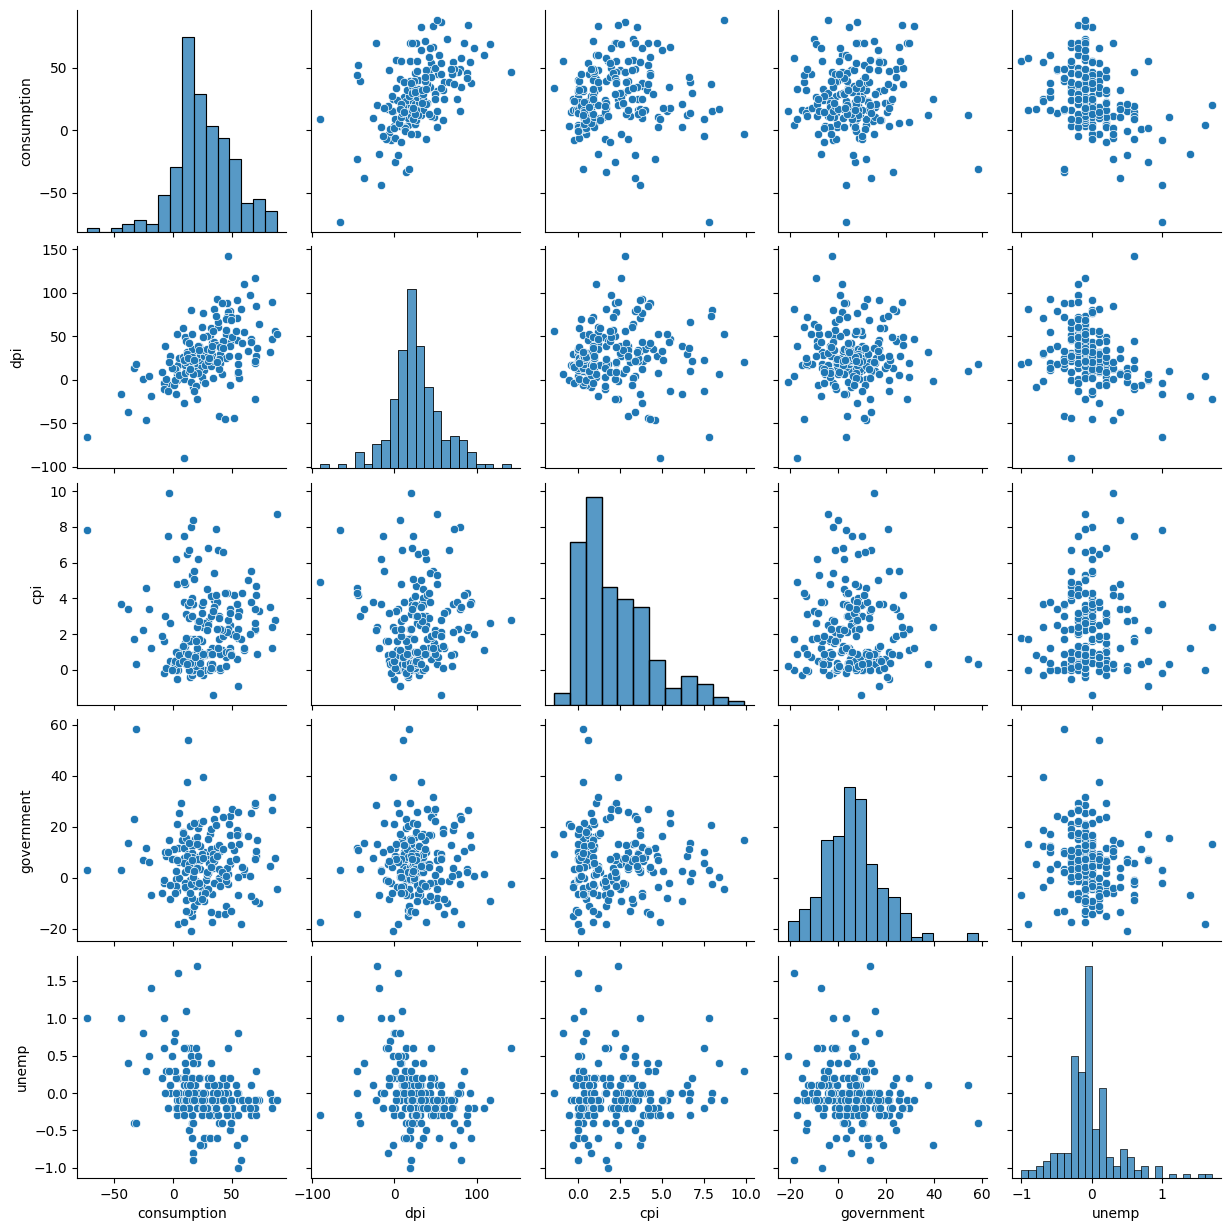

In [5]:
subset = macro_diff[['consumption', 'dpi', 'cpi', 'government', 'unemp']]
sns.pairplot(subset);

#### Problem 1

From the plots, consumption appears to be correlation most strongly with real disposable income.

There does not appear to be much tail dependency in the pairs examined.

Looking at correlation, we see that there is also a negative correlation between consumption and unemployment, though lower in absolute value compared with disposable income.

There is some negative correlation between disposable income and unemployment, which might result in some collinearity between the two variables.

In [6]:
subset.corr()

,consumption,dpi,cpi,government,unemp
consumption,1.000000,0.524762,0.061640,0.038774,-0.387779
dpi,0.524762,1.000000,0.031558,0.005147,-0.295534
cpi,0.061640,0.031558,1.000000,-0.021342,0.055905
government,0.038774,0.005147,-0.021342,1.000000,-0.149752
unemp,-0.387779,-0.295534,0.055905,-0.149752,1.000000


#### Problem 2

In [7]:
import statsmodels.api as sm

In [8]:
x = subset[['dpi', 'cpi', 'government', 'unemp']]
y = subset['consumption']

In [9]:
model_def = sm.OLS(y, sm.add_constant(x))
model = model_def.fit()

In [10]:
type(model)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.33
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           5.86e-17
Time:                        18:33:39   Log-Likelihood:                -897.53
No. Observations:                 203   AIC:                             1805.
Df Residuals:                     198   BIC:                             1822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7523      2.520      5.854      0.000       9.783      19.722
dpi            0.3530      0.048      7.358      0.000       0.258       0.448
cpi            0.7266      0.679      1.070      0.286      -0.612       2.065
government    -0.0022      0.118     -0.018      0.985      -0.235       0.231
unemp        -16.3044      3.855     -4.229      0.000     -23.907      -8.702
==============================================================================
Omnibus:                        9.982   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.962
Skew:                           0.384   Prob(JB):                      0.00253
Kurtosis:                       3.907   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results suggest that disposable income (`dpi`) and unemployment (`unemp`) are most useful in predicting consumption.

Another way of doing the same is using the formula-based API.

In [12]:
from statsmodels.formula.api import ols

In [13]:
model_def = ols('consumption ~ dpi + cpi + government + unemp', data=subset)
model = model_def.fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     25.33
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           5.86e-17
Time:                        18:33:40   Log-Likelihood:                -897.53
No. Observations:                 203   AIC:                             1805.
Df Residuals:                     198   BIC:                             1822.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.7523      2.520      5.854      0.000       9.783      19.722
dpi            0.3530      0.048      7.358      0.000       0.258       0.448
cpi            0.7266      0.679      1.070      0.286      -0.612       2.065
government    -0.0022      0.118     -0.018      0.985      -0.235       0.231
unemp        -16.3044      3.855     -4.229      0.000     -23.907      -8.702
==============================================================================
Omnibus:                        9.982   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.962
Skew:                           0.384   Prob(JB):                      0.00253
Kurtosis:                       3.907   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Problem 3

The results of ANOVA confirm the conclusions from above, but do not provide new information for the purpose of variable selection.

In [15]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
dpi,1.0,34258.378613,34258.378613,82.429439,1.119895e-16
cpi,1.0,253.071631,253.071631,0.608918,4.361273e-01
government,1.0,170.795907,170.795907,0.410954,5.222271e-01
unemp,1.0,7433.536142,7433.536142,17.885908,3.582329e-05
Residual,198.0,82290.490811,415.608539,NaN,NaN


#### Problem 4

In [16]:
from common.misc import reduce_model

In [17]:
remaining_cols = reduce_model(x, y, lambda x, y: sm.OLS(y, x).fit())

Variables: ['dpi', 'cpi', 'government', 'unemp']
                    AIC
government  1803.064773
cpi         1804.235857
<none>      1805.064431
unemp       1820.620487
dpi         1852.130950
Dropping variable: government

Variables: ['dpi', 'cpi', 'unemp']
                AIC
cpi     1802.236782
<none>  1803.064773
unemp   1819.006544
dpi     1850.212720
Dropping variable: cpi

Variables: ['dpi', 'unemp']
                AIC
<none>  1802.236782
unemp   1817.577226
dpi     1849.883432
Stopping
One variable left in the model - stopping


In [18]:
model_reduced = sm.OLS(y, sm.add_constant(x[remaining_cols])).fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            consumption   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     50.31
Date:                Sun, 02 Apr 2023   Prob (F-statistic):           2.00e-18
Time:                        18:33:40   Log-Likelihood:                -898.12
No. Observations:                 203   AIC:                             1802.
Df Residuals:                     200   BIC:                             1812.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2848      1.911      8.522      0.000      12.517      20.053
dpi            0.3557      0.048      7.444      0.000       0.261       0.450
unemp        -16.0149      3.792     -4.223      0.000     -23.493      -8.537
==============================================================================
Omnibus:                       12.022   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.257
Skew:                           0.459   Prob(JB):                     0.000802
Kurtosis:                       3.919   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The `government` and `cpi` variables are removed by the stepwise proceduce, in that order.

#### Problem 5

The original model's AIC:

In [19]:
model.aic

1805.0644306434833

The reduced model's AIC:

In [20]:
model_reduced.aic

1802.2367823887023

The change in AIC:

In [21]:
model_reduced.aic - model.aic

-2.8276482547810247

The improvement is small and is close to the the change in the second term in the AIC formula (2 * 2 parameters = 4). This suggests that there is little change in the log-likelihood term of AIC and the improvement is coming mostly from the second term, which is less significant.

#### Problem 6

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
def vif(x):
    x = sm.add_constant(x, prepend=True)
    return pd.Series([variance_inflation_factor(x, i) for i in range(len(x.columns)) if x.columns[i] != 'const'], index=x.columns[1:])

In [24]:
vif(x)

dpi           1.100321
cpi           1.005814
government    1.024822
unemp         1.127610
dtype: float64

In [25]:
vif(x[remaining_cols])

dpi      1.095699
unemp    1.095699
dtype: float64

The multicollinearity is not too high for the original model. It is reduced by dropping `government` and `cpi`, not not dramatically so.

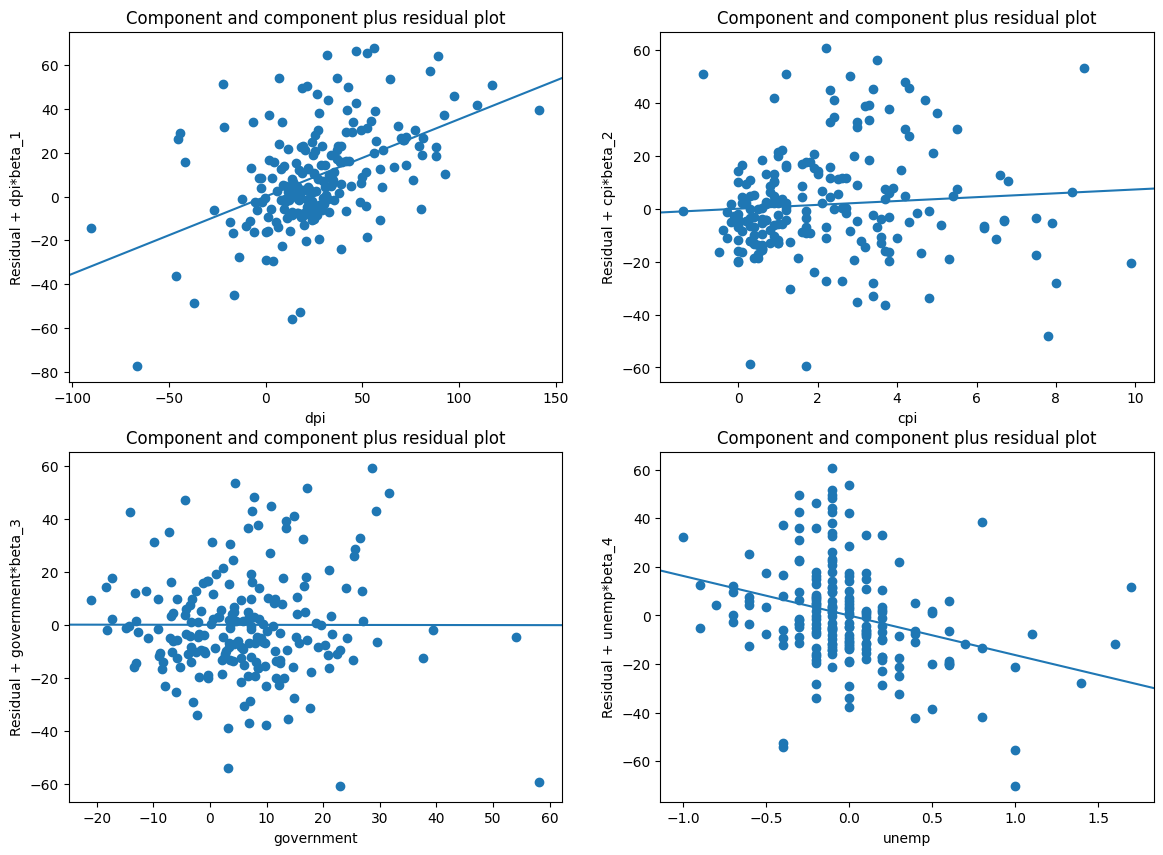

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sm.graphics.plot_ccpr(model, 'dpi', ax=axs[0][0]);
sm.graphics.plot_ccpr(model, 'cpi', ax=axs[0][1]);
sm.graphics.plot_ccpr(model, 'government', ax=axs[1][0]);
sm.graphics.plot_ccpr(model, 'unemp', ax=axs[1][1]);

The plots indicate that `dpi` and `unemp` have explanatory power, whereas `cpi` and `government` have little explanatory power.